In [18]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

In [19]:
tx_data = pd.read_csv('OnlineRetail.csv', encoding='latin')

tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [20]:
#converting the type of Invoice Date Field from string to datetime.
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

#creating YearMonth field for the ease of reporting and visualization
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue.head(15)

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Text(0.5, 1.0, 'Monthly Revenue')

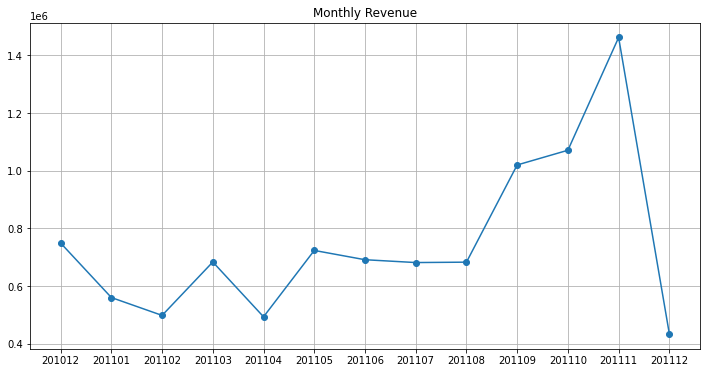

In [21]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['Revenue'], marker='o')
plt.grid()
plt.title('Monthly Revenue')

In [22]:
#using pct_change() function to see monthly percentage change
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head(13)

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


Text(0.5, 1.0, 'Monthly Growth Rate')

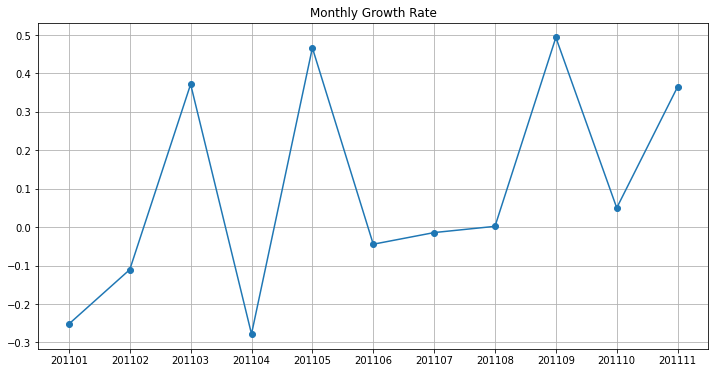

In [23]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str)[:-1], tx_revenue['MonthlyGrowth'][:-1], marker='o')
plt.grid()
plt.title('Monthly Growth Rate')

In [28]:
from IPython.display import display, HTML
display(HTML('<h2>what exactly happened on April. Was it due to less active customers or our customers did less orders? Maybe they just started to buy cheaper products?</h2>'))

In [29]:
# Monthly Active Customers

#creating a new dataframe with UK customers only
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


Text(0.5, 1.0, 'Monthly Active Customers')

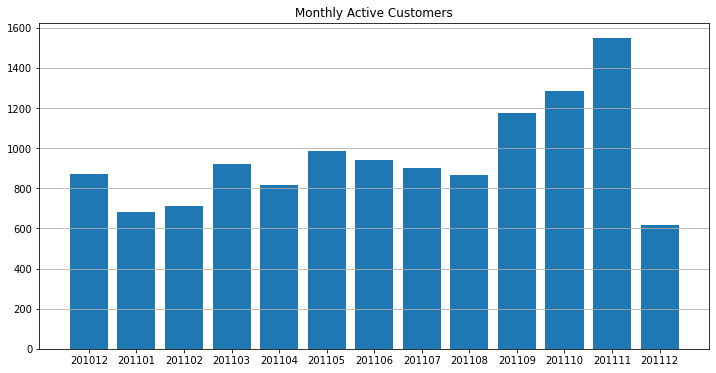

In [33]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_active['CustomerID'])
plt.grid(axis='y')
plt.title('Monthly Active Customers')

In [34]:
# Monthly Order Count

#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


Text(0.5, 1.0, 'Monthly Total # of Order')

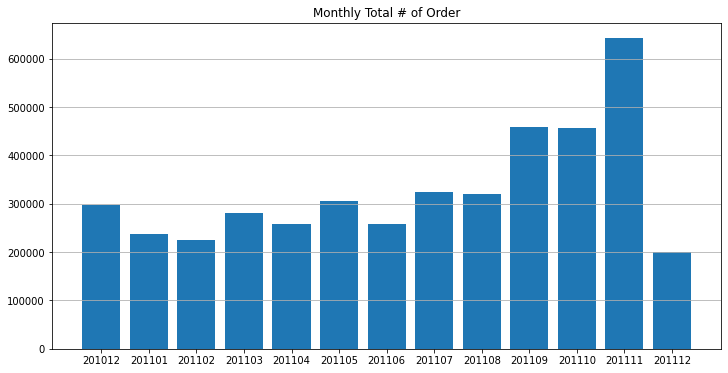

In [35]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_sales['Quantity'])
plt.grid(axis='y')
plt.title('Monthly Total # of Order')

In [36]:
# Average Revenue per Order

# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

#print the dataframe
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


Text(0.5, 1.0, 'Monthly Order Average')

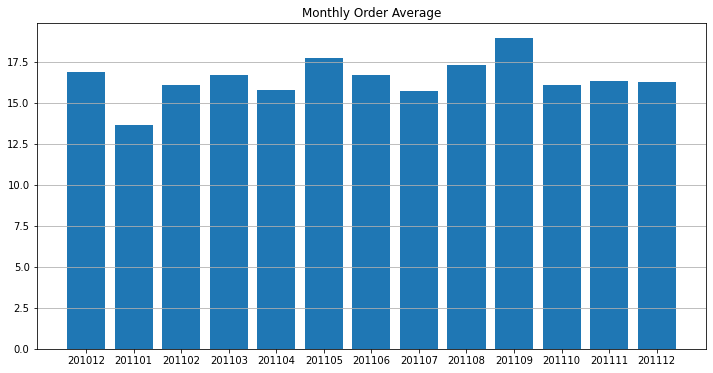

In [37]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_order_avg['Revenue'])
plt.grid(axis='y')
plt.title('Monthly Order Average')

In [38]:
# New Customer Ratio

#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [40]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

Text(0.5, 1.0, 'New vs Existing')

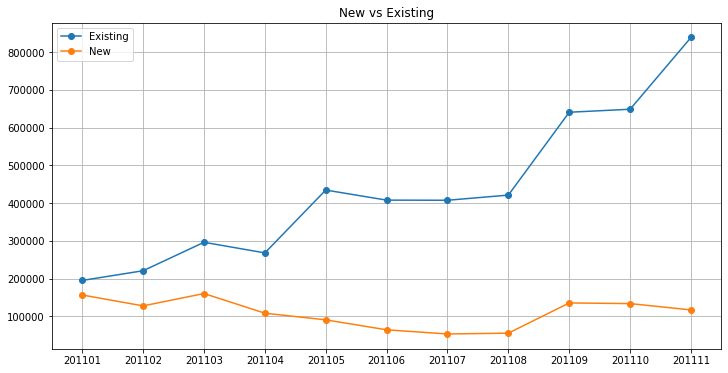

In [48]:
plt.figure(figsize=(12,6))
plt.plot(tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype=str), tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'], label='Existing', marker='o')
plt.plot(tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype=str), tx_user_type_revenue.query("UserType == 'New'")['Revenue'], label = 'New', marker='o')
plt.grid()
plt.legend(loc='best')
plt.title('New vs Existing')

In [49]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


Text(0.5, 1.0, 'New Customer Ratio')

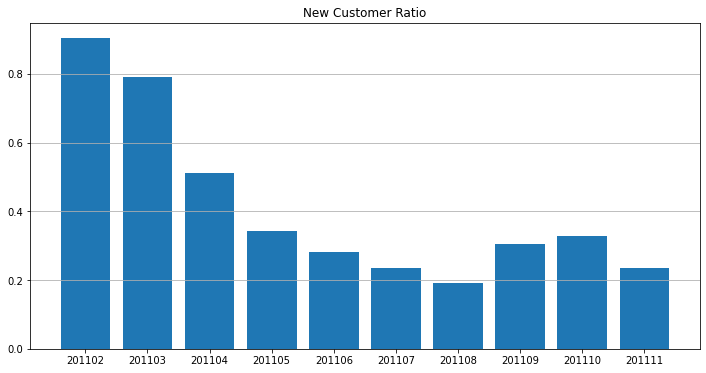

In [51]:
plt.figure(figsize=(12,6))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str), tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'])
plt.grid(axis='y')
plt.title('New Customer Ratio')

In [54]:
# Monthly Retention Rate

#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [55]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']


Text(0.5, 1.0, 'New Customer Ratio')

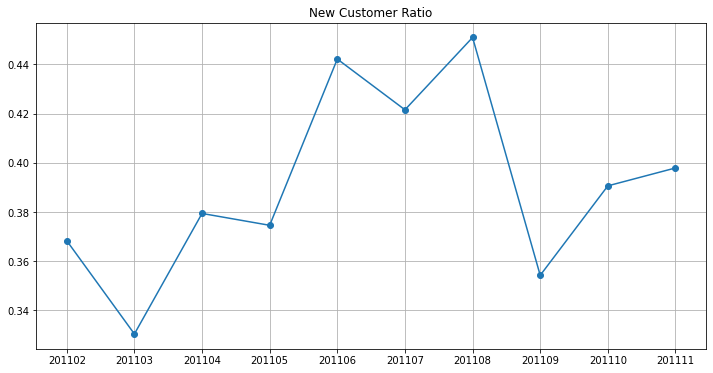

In [58]:
plt.figure(figsize=(12,6))
plt.plot(tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str), tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'], marker='o')
plt.grid()
plt.title('New Customer Ratio')

In [59]:
#create our retention table again with crosstab() and add firs purchase year month view
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention = pd.merge(tx_retention,tx_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
tx_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention.index = months

#showing new cohort based retention table
tx_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
